In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

# inline嵌入文件，tk弹出画图窗口
%matplotlib inline
plt.style.use('seaborn-whitegrid')  # 空白网格
# 设置字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取文件
file_path = "D:\Desktop\data\Top250_film"
df = pd.read_csv(file_path + str('.csv'))
columns = df.columns

# 分类文件信息
rank_film = [int(i) for i in list(df['排名'])]
director_film = list(df['导演'])  # str，导演
name_film = list(df['电影'])  # str，电影
time_film = [int(i) for i in list(df['时间'])]  # int， 上映时间
people_film = [int(i) for i in list(df['评价人数（人）'])]  # int 评价人数
score_film = [float(i) for i in list(df['评分'])]  # float，评分
country_film = []  # str 国家，按空格将一个分解成多个
for i in list(df['国家']):
    for j in i.split():
        country_film.append(j)
type_film = [] # str 类型，同上
for i in list(df['类型']):
    for j in i.split():
        type_film.append(j)

In [2]:
# 优化 二维 图形界面，标签大小，布局
def picture_design(ax, label_lst):
    # 调整标签字体 大小 和 位置
    for i, single_ax in enumerate(ax):
        single_ax.set_xlabel(label_lst[i][0], fontsize=12)  # 设置 横坐标 标签字体大小
        single_ax.set_ylabel(label_lst[i][1], fontsize=12)  # 设置 纵坐标 标签字体大小
        single_ax.set_title(label_lst[i][2], fontsize=14)  # 设置 标题 字体大小

    plt.tight_layout()  # 自动调整子图布局，减少 重叠
    plt.subplots_adjust(hspace=0.6);  # 调整子图之间的 间距
    

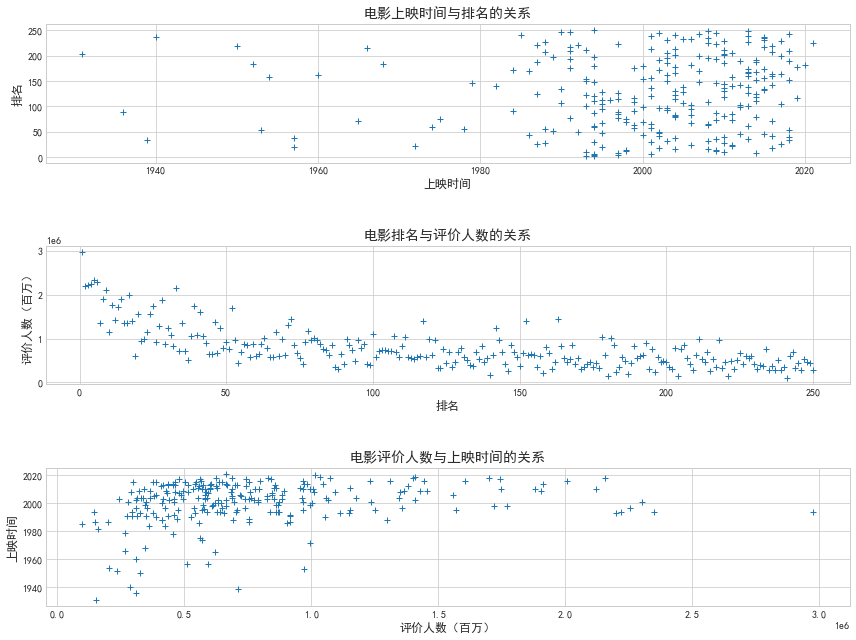

In [3]:
## 散点图
fig, ax = plt.subplots(3, figsize=(12, 9))  # 设置图形 长度 和 宽度

# 定义并整合 标签 和 数据
scatter_lst1 = ['上映时间', '排名', '电影上映时间与排名的关系']
scatter_lst2 = ['排名', '评价人数（百万）', '电影排名与评价人数的关系']
scatter_lst3 = ['评价人数（百万）', '上映时间', '电影评价人数与上映时间的关系']

scatter_lst = [scatter_lst1, scatter_lst2, scatter_lst3]
data_lst = [time_film, rank_film, people_film]

# 设置数据索引,[[0, 1], [1, 2], [2, 0]]
index_data = [[i, (i+1)%len(data_lst)] for i in range(len(data_lst))]  # 存储 索引

# 依次画出三个子图，上映时间 与 排名，排名 与 评价人数，评价人数 与 上映时间
for i, item in enumerate(index_data):
    ax[i].plot(data_lst[item[0]], data_lst[item[1]], '+') 

# 优化图形界面
picture_design(ax, scatter_lst)

# 保存到指定位置
# fig.savefig('d:\desktop\豆瓣电影Top250数据散点图')


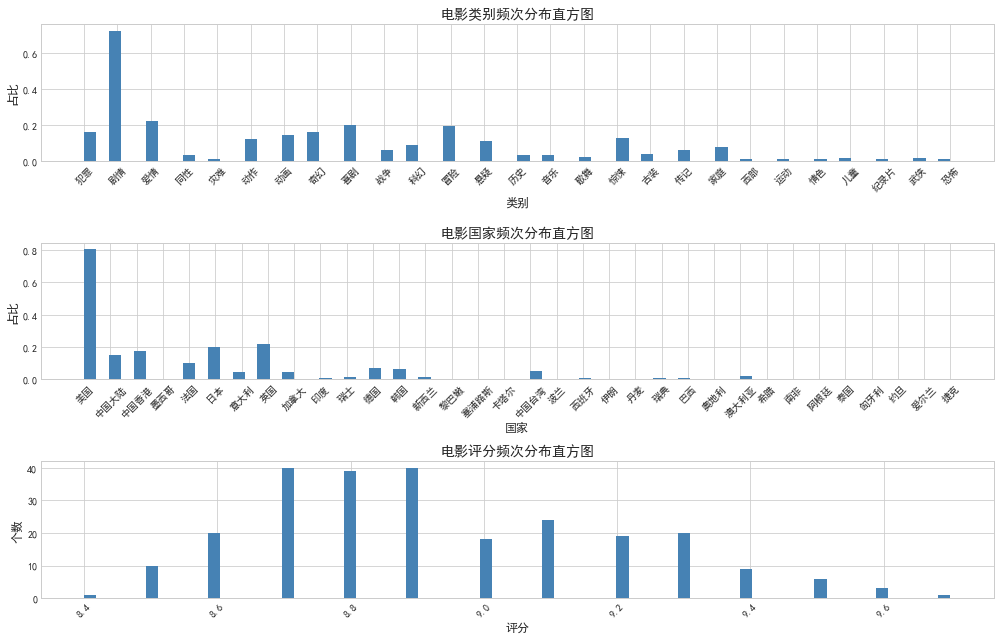

In [4]:
## 直方图
fig, ax = plt.subplots(3, figsize=(14, 9))  # 设置图的 宽度 和 高度

# 定义并整合 标签 和 数据
hist_lst1 = ['类别', '占比', '电影类别频次分布直方图']
hist_lst2 = ['国家', '占比', '电影国家频次分布直方图']
hist_lst3 = ['评分', '个数', '电影评分频次分布直方图']
hist_lst = [hist_lst1, hist_lst2, hist_lst3]
data_lst = [type_film, country_film, score_film]

# 依次画出三个子图，包括 类别，国家，评分
for i, item in enumerate(data_lst):
    density_value = True if i != 2 else False  # 区分 评分 子图
    ax[i].hist(item, bins=70, density=density_value, alpha=1,
               histtype='stepfilled', color='steelblue',
               edgecolor='none')
    # 旋转子图中的横坐标的 角度
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

# 优化图形界面
picture_design(ax, hist_lst)

# 保存到指定位置
# fig.savefig('d:\desktop\豆瓣电影Top250数据直方图.png')